## Ejercicios

- Importa el archivo datos_1.csv, y datos_2.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
datos1 = pd.read_csv('datos_1.csv', parse_dates=['date'], usecols=['date', 'close', 'ticker'])
datos1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7706 entries, 0 to 7705
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    7706 non-null   datetime64[ns]
 1   close   7704 non-null   float64       
 2   ticker  7705 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 180.7+ KB


In [3]:
datos2 = pd.read_csv('datos_2.csv', parse_dates=['date'], usecols=['date', 'close', 'ticker'])
datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4167 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    4167 non-null   datetime64[ns]
 1   close   4166 non-null   float64       
 2   ticker  4166 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 97.8+ KB


In [4]:
datos1.head()

,date,close,ticker
0,2003-01-02,7.656343,NTGY
1,2003-01-03,7.559982,NTGY
2,2003-01-07,7.682624,NTGY
3,2003-01-08,7.884107,NTGY
4,2003-01-09,7.945427,NTGY


- Crea un dataframe en el que se incluyan los datos de ambos archivos

In [5]:
datos = pd.concat([datos1, datos2])
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


In [6]:
datos[datos['ticker'].isna()]

,date,close,ticker
4185,2005-07-28,3.135777,NaN
17,2003-01-28,1.952477,NaN


Puedo quedarme con aquellas filas en las que ticker is not na

In [7]:
datos = datos[datos['ticker'].notna()]
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11871 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11871 non-null  datetime64[ns]
 1   close   11868 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


Puedo rellenar los valores de ticker con el valor de ticker anterior

In [8]:
datos = pd.concat([datos1, datos2])
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11871 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


In [9]:
datos['ticker'].fillna(method='ffill', inplace=True)
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11873 entries, 0 to 4166
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    11873 non-null  datetime64[ns]
 1   close   11870 non-null  float64       
 2   ticker  11873 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 371.0+ KB


- Con el dataframe anterior crea un nuevo df llamado **stocks_df**, en el que tengamos el ticker como nombre de columna, las fechas como índice y los valores sean el cierre

In [10]:
stocks_df = datos.pivot(columns='ticker', values='close', index='date')
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4167 entries, 2003-01-02 to 2019-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NTGY    4167 non-null   float64
 1   REE     3537 non-null   float64
 2   SAN     4166 non-null   float64
dtypes: float64(3)
memory usage: 130.2 KB


- Limpia los datos de la manera que creas conveniente, haz una descripción de los datos antes y después de la limpieza. Explica sus diferencias

Primero veo los NaN existentes

In [11]:
stocks_df[stocks_df.isna().any(axis=1)]

ticker,NTGY,REE,SAN
date,,,
2003-01-02,7.656343,NaN,2.309851
2003-01-03,7.559982,NaN,2.222686
2003-01-07,7.682624,NaN,2.309851
2003-01-08,7.884107,NaN,2.309851
2003-01-09,7.945427,NaN,2.309851
...,...,...,...
2005-06-29,10.380740,NaN,3.521433
2005-06-30,10.415781,NaN,3.512716
2005-07-13,10.626024,NaN,3.626030


Veo cuál es el primer valor no NaN de cada columna

In [12]:
stocks_df.apply(pd.Series.first_valid_index)

ticker
NTGY   2003-01-02
REE    2005-07-01
SAN    2003-01-02
dtype: datetime64[ns]

Elimino las filas hasta el primer valor de REE

In [13]:
stocks_df = stocks_df.loc['2005-07-01':]

Busco si hay nuevos NaN

In [14]:
stocks_df.isna().sum()

ticker
NTGY    0
REE     3
SAN     0
dtype: int64

In [15]:
stocks_df[stocks_df.isna().any(axis=1)]

ticker,NTGY,REE,SAN
date,,,
2005-07-13,10.626024,NaN,3.626030
2005-08-03,10.643544,NaN,3.748059
2005-09-13,10.293139,NaN,3.791641


Como son pocos valores y no consecutivos, los relleno usando el método ffill

In [16]:
stocks_df.fillna(method='ffill', inplace=True)

In [17]:
stocks_df.isna().sum()

ticker
NTGY    0
REE     0
SAN     0
dtype: int64

In [18]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3540 entries, 2005-07-01 to 2019-05-15
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   NTGY    3540 non-null   float64
 1   REE     3540 non-null   float64
 2   SAN     3540 non-null   float64
dtypes: float64(3)
memory usage: 110.6 KB


- Calcula los retornos diarios (porcetuales y logarítmicos) de los datos.

In [19]:
stocks_df_ret = stocks_df.pct_change().dropna()
stocks_df_ret.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-04,-0.006633,-0.012725,-0.002439
2005-07-05,0.000835,-0.005333,0.002445
2005-07-06,-0.002502,-0.008490,0.000000
2005-07-07,-0.022575,-0.008562,-0.021951
2005-07-08,0.019675,0.016364,0.019950


In [20]:
stocks_df_log_ret = np.log(stocks_df).diff().dropna()
stocks_df_log_ret.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-04,-0.006656,-0.012807,-0.002442
2005-07-05,0.000834,-0.005348,0.002442
2005-07-06,-0.002505,-0.008526,0.000000
2005-07-07,-0.022834,-0.008599,-0.022196
2005-07-08,0.019484,0.016231,0.019754


- Calcula los retornos semanales, mensuales, y anuales

In [21]:
stocks_df_week = stocks_df.resample('W').last().pct_change().dropna()
stocks_df_week.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-10,-0.011609,-0.018868,-0.002439
2005-07-17,0.004195,-0.013864,0.017115
2005-07-24,0.029240,0.016327,0.007212
2005-07-31,-0.007305,-0.009371,0.021480
2005-08-07,-0.011447,0.002252,-0.009346


In [22]:
stocks_df_month = stocks_df.resample('M').last().pct_change().dropna()
stocks_df_month.head()

ticker,NTGY,REE,SAN
date,,,
2005-08-31,-0.020442,-0.014865,-0.028037
2005-09-30,0.006678,0.085963,0.103365
2005-10-31,-0.060531,-0.063158,-0.010893
2005-11-30,0.016770,0.057079,0.006608
2005-12-31,0.024306,0.112245,0.043764


- Crea una nueva columna en el dataframe usando la función apply, que  calcule el ratio de sharpe. (usa una ventana de 15 días) 

In [23]:
window = 15
stocks_df_log_ret.rolling(15).apply(lambda x: np.sqrt(15) * x.mean()/x.std()).dropna()
stocks_df_log_ret.head()

ticker,NTGY,REE,SAN
date,,,
2005-07-04,-0.006656,-0.012807,-0.002442
2005-07-05,0.000834,-0.005348,0.002442
2005-07-06,-0.002505,-0.008526,0.000000
2005-07-07,-0.022834,-0.008599,-0.022196
2005-07-08,0.019484,0.016231,0.019754


- Crea un modulo con una función que dado los valores de cierre de un activo calcule las bandas de Bollinger. Recuerda que las bandas Bollinger se calculan como MA − Kσ y MA + Kσ, donde MA es la media móvil de 30 muestras sobre el precio, σ es la desviación típica móvil de 30 muestras sobre el precio y K = 2. Importa el modulo y demuestra que funciona

In [25]:
from modulo_alfonso import añade_bollinger, añade_cruces

- Grafica las bandas de bollinger y los datos de cierre. Guarda la imagen en un archivo llamado **bollinger.png**

In [42]:
data_bollinger = stocks_df.loc[:, ['SAN']]
data_bollinger.columns = ['close']
data_bollinger.head()

,close
date,
2005-07-01,3.573731
2005-07-04,3.565015
2005-07-05,3.573731
2005-07-06,3.573731
2005-07-07,3.495283


In [43]:
stocks_bollinger = añade_bollinger(data_bollinger, 30, 30)
stocks_bollinger.head()

,close,upper_band,lower_band
date,,,
2005-08-11,3.739343,3.791452,3.522203
2005-08-12,3.739343,3.796454,3.528242
2005-08-15,3.730627,3.798997,3.536740
2005-08-16,3.721910,3.800378,3.545237
2005-08-17,3.678328,3.798254,3.554335


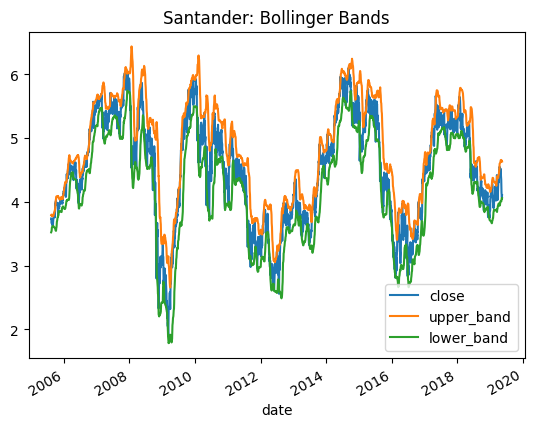

In [47]:
stocks_bollinger.plot()
plt.title('Santander: Bollinger Bands')
plt.savefig('bollinger.png')

- Genera un columna donde nos marque 1 cuando la cotizacion cruce la banda de bolliger inferior hacia arriba, -1 cuando cruce la banda superior hacia abajo, y 0 en el resto.

In [49]:
stocks_cruce = añade_cruces(stocks_bollinger)
stocks_cruce.head(50)

/home/alfonso/Desktop/universidad/python_finance/Practicas/modulo_alfonso.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["upper_cross"] = upper_cross
/home/alfonso/Desktop/universidad/python_finance/Practicas/modulo_alfonso.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["lower_cross"] = lower_cross


,close,upper_band,lower_band,upper_cross,lower_cross
date,,,,,
2005-08-11,3.739343,3.791452,3.522203,False,False
2005-08-12,3.739343,3.796454,3.528242,False,False
2005-08-15,3.730627,3.798997,3.536740,False,False
2005-08-16,3.721910,3.800378,3.545237,False,False
2005-08-17,3.678328,3.798254,3.554335,False,False
2005-08-18,3.660895,3.783114,3.580516,False,False
2005-08-19,3.721910,3.779177,3.594912,False,False
2005-08-22,3.730627,3.779617,3.602608,False,False
2005-08-23,3.687044,3.776600,3.610854,False,False
